# Librosa

<quote>"LibROSA is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems."</quote>


http://librosa.github.io/librosa/

Let's pick some stuff from the demo notebook (https://github.com/librosa/librosa/blob/master/examples/LibROSA%20audio%20effects%20and%20playback.ipynb)

In [1]:
# good old matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# new stuff
import librosa
import librosa.display

# from previous notebook
from IPython.display import Audio
import numpy as np


As you know, I've started a podcast, [Something for your mind](http://archiv.es/s4ym). Let's play part of the jingle (the mp3 file is already local). Thanks Deepthi for the voice sample.

In [2]:
y, sample_rate = librosa.load('jingle_s4ym.mp3')

convenient, we'll get the data, and the sampling rate. This is important since an mp3 or PCM wav file could have a sampling rate ranging from 8KHz (mostly older telephony systems) up to 192KHz, or even higher (used in direct conversion).

In [3]:
Audio(data=y, rate=sample_rate)

Median-filtering harmonic percussive source separation

In [4]:
y_harm, y_perc = librosa.effects.hpss(y)

In [5]:
Audio(data=y_harm, rate=sample_rate)

# Visualizing your audio

Using matplotlib's specgram. F(Hz) in y-axis and t(s) in x-axis.

http://matplotlib.org/examples/pylab_examples/specgram_demo.html

Oh, and let's specify the new 2.0 default colormap, viridis.

https://bids.github.io/colormap/

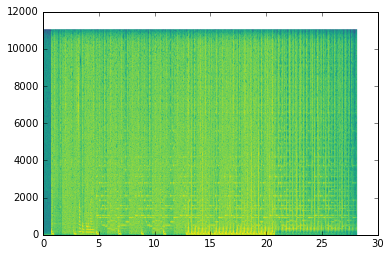

In [7]:
NFFT = 1024  # the length of the windowing segments

_ = plt.specgram(y, NFFT=NFFT, Fs=sample_rate, noverlap=512, cmap='viridis')

# Visualizing with librosa.display

From the demo notebook linked at the beginning.

In [8]:
# How about something more advanced?  Let's decompose a spectrogram with NMF, and then resynthesize an individual component
D = librosa.stft(y)

# Separate the magnitude and phase
S, phase = librosa.magphase(D)

# Decompose by nmf
components, activations = librosa.decompose.decompose(S, n_components=8, sort=True)

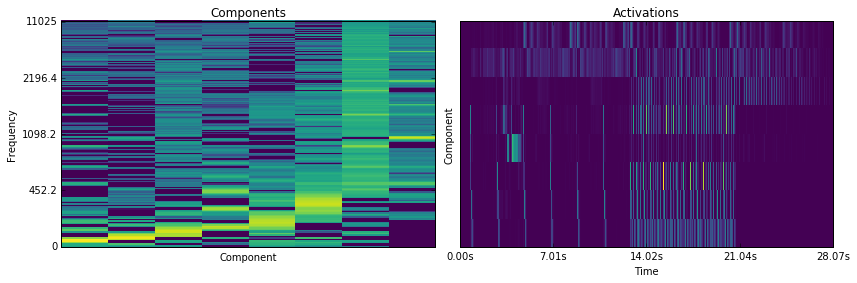

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
librosa.display.specshow(librosa.logamplitude(components**2.0, ref_power=np.max),
                         y_axis='log',
                         cmap='viridis')
plt.xlabel('Component')
plt.ylabel('Frequency')
plt.title('Components')

plt.subplot(1,2,2)
librosa.display.specshow(activations, x_axis='time', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Component')
plt.title('Activations')

plt.tight_layout()